# Exploratory Data Analysis on Advanced House Price Prediction Dataset

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [9]:
#displaying all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [3]:
#reading the csv file
data = pd.read_csv('train.csv')


## Data Analysis 
In Data Analysis we perform the following operations:
    
    1.Missing values
    2.Numerical variables
    3.Distribution of numerical variables
    4.Categorical variables
    5.Cardinality of categorical variales
    6.Outliers
    7.Relationship between dependent and independent features

In [4]:
#printing the shape of the dataframe to understand the no. of rows and columns
data.shape

(1460, 81)

In [5]:
#Printing the first five rows
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1.Missing Values

In [16]:
#finding the features with null values
features_with_na = [features for features in data.columns if data[features].isnull().sum()>0]
print(len(features_with_na))


#Displaying the percentage of null values
for feature in features_with_na:
    print(feature, data[feature].isnull().mean().round(4),  ' % missing values')

19
LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
Electrical 0.0007  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


In [12]:
# Alternate method for finding  percentage of missing values
for features in data.columns:
    a=(data[features].isnull().sum()/(len(data[features])))*100
    if a==0:
        continue
    else:
        print(features + "  ",a, "% missing values")
    
    


LotFrontage   17.73972602739726 % missing values
Alley   93.76712328767123 % missing values
MasVnrType   0.547945205479452 % missing values
MasVnrArea   0.547945205479452 % missing values
BsmtQual   2.5342465753424657 % missing values
BsmtCond   2.5342465753424657 % missing values
BsmtExposure   2.6027397260273974 % missing values
BsmtFinType1   2.5342465753424657 % missing values
BsmtFinType2   2.6027397260273974 % missing values
Electrical   0.0684931506849315 % missing values
FireplaceQu   47.26027397260274 % missing values
GarageType   5.5479452054794525 % missing values
GarageYrBlt   5.5479452054794525 % missing values
GarageFinish   5.5479452054794525 % missing values
GarageQual   5.5479452054794525 % missing values
GarageCond   5.5479452054794525 % missing values
PoolQC   99.52054794520548 % missing values
Fence   80.75342465753424 % missing values
MiscFeature   96.30136986301369 % missing values


In [22]:
data['LandContour'].isnull().sum()

0

### Visualising Missing Values 
Here we will be displaying the heatmap of missing values in each column for a better understanding of the concentration of missing values in each column.

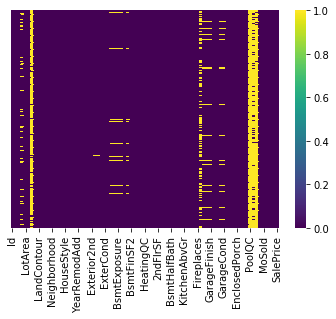

In [20]:
sns.heatmap(data.isnull(), yticklabels = False , cmap = 'viridis')

### Since there are many missing values we find the relationship between mising values and Sales Price
Here we will convert the null values into 1 and non null values into 0 and analyse the impact on median of each column with and without null values 

In [25]:
print(data.groupby('LotFrontage')['SalePrice'].median())

LotFrontage
21.0      91000.0
24.0     147400.0
30.0     151000.0
32.0     162000.0
33.0     113000.0
           ...   
160.0    745000.0
168.0    274725.0
174.0    319000.0
182.0    259000.0
313.0    201000.0
Name: SalePrice, Length: 110, dtype: float64


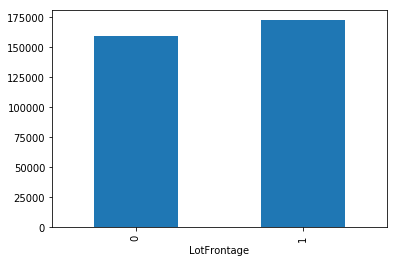

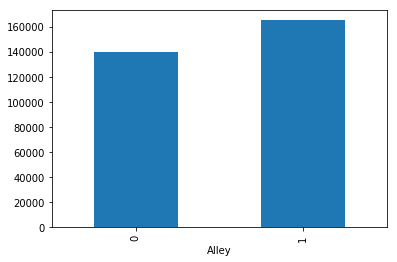

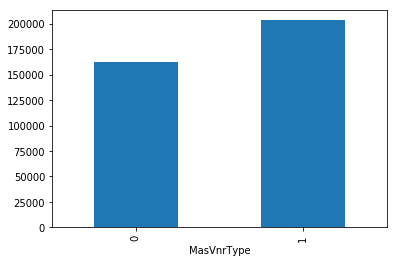

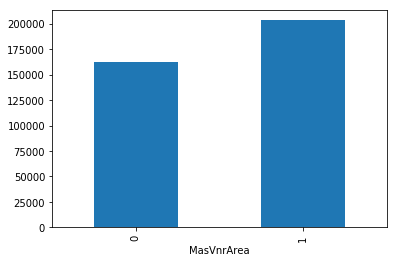

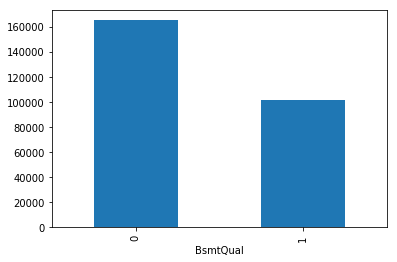

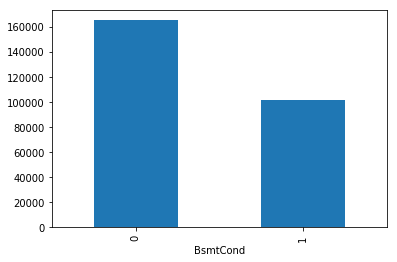

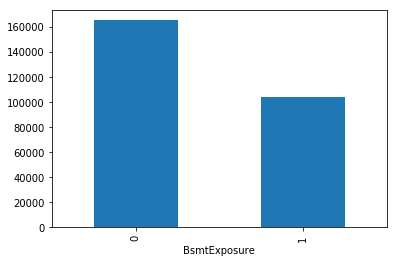

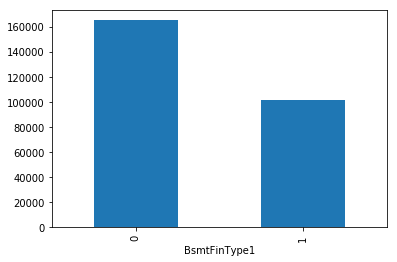

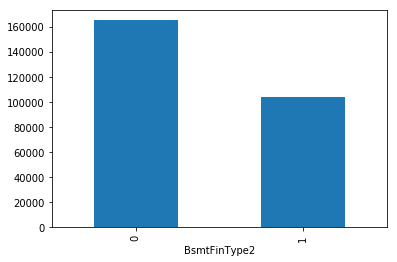

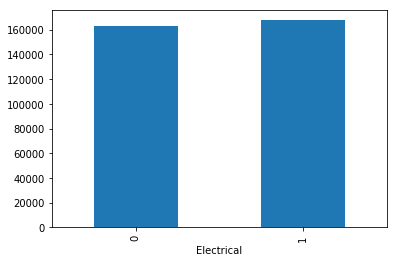

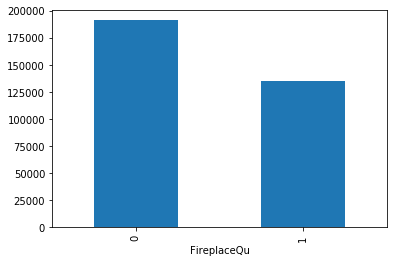

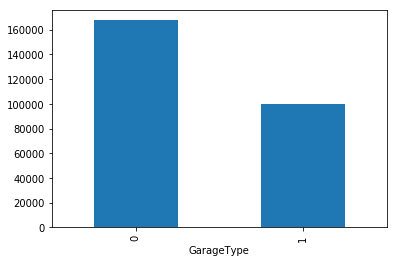

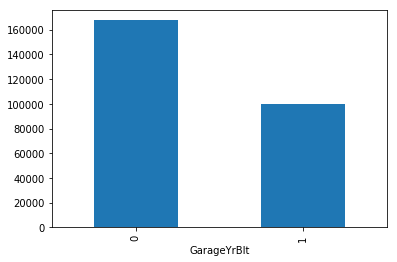

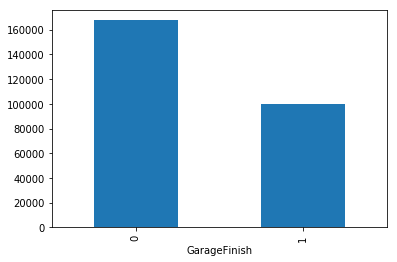

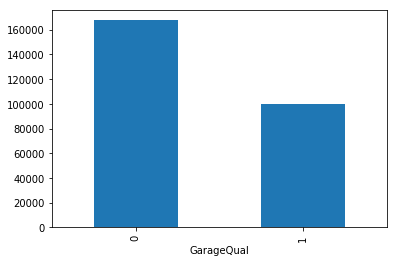

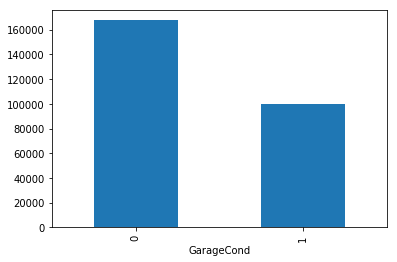

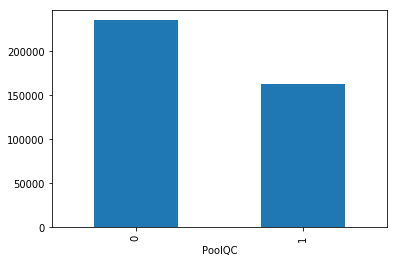

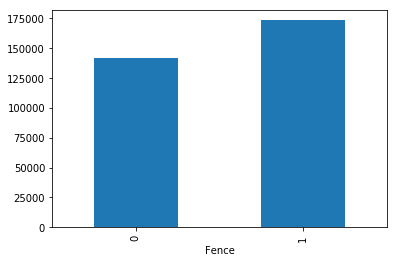

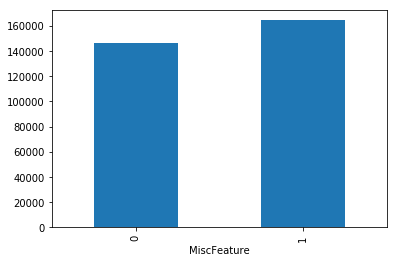

In [27]:
# copying the dataset into a new object named data1
data1 = data.copy()

for feature in features_with_na:
     
    
    #replacing the null values with 1 and not null values with 0
    data1[feature] = np.where(data1[feature].isnull(),1,0)
    
    data1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.show()

Analysing the above barcharts we can understand that whenever there are null values, it impacts the median salesprice. So it is necessary to replace these missing values with some meaningful value which is dealt in feature engineerig section.
